In [1]:
## Image Enhancement of fingerprint using Gabor filter with parameters
import glob
import os
import cv2
import numpy as np

os.chdir('C:/Users/vinayaka s sajjan/Desktop/file_manager/python/IFSCR')

def nothing(x):
    pass

def show(img,s,l,t,g,p):
    g_kernel= cv2.getGaborKernel((25,25),s/10,(t*np.pi)/4,l/10,g/10,p/10,cv2.CV_32F)
    filtered=cv2.filter2D(img,cv2.CV_8UC3,g_kernel)
    cv2.imshow("image1",filtered)
    key = cv2.waitKey(1) & 0xFF
    if key==ord('s'):
        cv2.imwrite("proc.png",filtered)
        
img = cv2.imread("fing.png",0)
cv2.namedWindow('image')

cv2.createTrackbar('sigma','image',0,100,nothing)
cv2.createTrackbar('lambda','image',0,200,nothing)
cv2.createTrackbar('theta','image',1,5,nothing)
cv2.createTrackbar('gamma','image',0,200,nothing)
cv2.createTrackbar('psi','image',0,100,nothing)

while(1):
    
    #cv2.imshow('image',img)

    s=cv2.getTrackbarPos('sigma','image')
    l=cv2.getTrackbarPos('lambda','image')
    t=cv2.getTrackbarPos('theta','image')
    g=cv2.getTrackbarPos('gamma','image')
    p=cv2.getTrackbarPos('psi','image')

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
   
    #print(s/10,l/10,t,g/10,p/10)

    show(img,s,l,t,g,p)
    #g_kernel= cv2.getGaborKernel((25,25),s,(t*np.pi)/4,l,g,p,cv2.CV_32F)
    #img=cv2.filter2D(img,cv2.CV_8UC3,g_kernel)
    
cv2.destroyAllWindows()

In [2]:
img= cv2.imread("original.png",0)
def fing_apply(s,l,t,g,p,name):
        g_kernel= cv2.getGaborKernel((25,25),s/10,(t*np.pi)/4,l/10,g/10,p/10,cv2.CV_32F)
        filtered=cv2.filter2D(img,cv2.CV_8UC3,g_kernel)
        cv2.imwrite(name,filtered)

In [3]:
fing_apply(15,21,1,0,0,"fm_ori.png")

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\filter.dispatch.cpp:1530: error: (-215:Assertion failed) !_src.empty() in function 'cv::filter2D'


In [4]:
## background removal.
import cv2
import numpy as np

def nothing(x):
    pass


bg_img = cv2.imread("proc.png",1)
hsv=cv2.cvtColor(bg_img, cv2.COLOR_BGR2HSV)
cv2.namedWindow('bg_removed')

lower = np.array([0,0,0])


cv2.createTrackbar('bg_value','bg_removed',0,255,nothing)


while(True):
    bg_val=cv2.getTrackbarPos('bg_value','bg_removed')
    upper = np.array([bg_val,bg_val,bg_val])
    mask = cv2.inRange(hsv, lower, upper)
   ## res = cv2.bitwise_and(bg_img,bg_img, mask= mask)
    
    cv2.imshow("bg_removed",mask)
    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    if k==ord('s'):
        print("screenshot taken ---> bg_rem.png")
        cv2.imwrite("bg_rem.png",mask)

cv2.destroyAllWindows()


In [6]:
## Final module and merge......

def final_module(s,l,g,p,bg_rem):
    img = cv2.imread("fing.png",0)
    lower = np.array([0,0,0])
    upper = np.array([bg_rem,bg_rem,bg_rem])
    c=1
    for i in range(1,5):
        g_kernel= cv2.getGaborKernel((25,25),s/10,(i*np.pi)/4,l/10,g/10,p/10,cv2.CV_32F)
        filtered=cv2.filter2D(img,cv2.CV_8UC3,g_kernel)
        img_list=[]
        name="save/img_"+str(i)+".png"
        img_list.append(name)
        cv2.imwrite(name,filtered)
        bg_img=cv2.imread(name,1)
        hsv=cv2.cvtColor(bg_img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower, upper)
        name="save_bw/bw_img_"+str(i)+".png"
        cv2.imwrite(name,mask)

In [7]:
def merge_all():
    files = glob.glob ("*.png")
    image_data = []
    for my_file in files:
        this_image = cv2.imread(my_file, 1)
        image_data.append(this_image)
        
    dst = image_data[0]
    for i in range(len(image_data)):
        if i == 0:
            pass
        else:
            alpha = 1.0/(1+i)
            beta = 1.0-alpha
            dst = cv2.addWeighted(image_data[i], alpha, dst, beta, 0.0)
    cv2.imwrite('result/merge.png', dst)
    
    

In [8]:
os.chdir('C:/Users/vinayaka s sajjan/Desktop/file_manager/python/IFSCR')
final_module(18,55,13,14,220)


In [12]:
print(os.getcwd())
os.chdir(os.getcwd()+'/save_bw')
merge_all()
        

C:\Users\vinayaka s sajjan\Desktop\file_manager\python\IFSCR


NameError: name 'merge_all' is not defined

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu
import numpy as np
from glob import glob
from scipy import misc
from matplotlib.patches import Circle,Ellipse
from matplotlib.patches import Rectangle
import os
from PIL import Image

In [5]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.layers.normalization import BatchNormalization

In [6]:
##data = glob('DB1_B/*')
data= glob('/SOCOFing/Real/*')
images = []
def read_images(data):
    for i in range(len(data)):
        img = cv2.imread(data[i],0)
        img = cv2.resize(img,(224,224))
        images.append(img)
    return images
images = read_images(data)
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr = images_arr.reshape(-1,100,100,1)
images_arr.shape

(0, 100, 100, 1)

In [10]:
for i in range(2):
    plt.figure(figsize=[5, 5])
    curr_img = np.reshape(images_arr[i], (224,224))
    plt.imshow(curr_img, cmap='gray')
    plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 360x360 with 0 Axes>

In [11]:
images_arr = images_arr / np.max(images_arr)
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(images_arr,images_arr,test_size=0.2,random_state=13)
batch_size = 128
epochs = 10
inChannel = 1
x, y = 224, 224
input_img = Input(shape = (x, y, inChannel))
def autoencoder(input_img):

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) 
    up1 = UpSampling2D((2,2))(conv4) 
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) 
    up2 = UpSampling2D((2,2))(conv5) 
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) 
    return decoded

ValueError: zero-size array to reduction operation maximum which has no identity

In [7]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       147584

In [8]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Epoch 1/10
1/1 [==============================] - 18s 18s/step - loss: 0.1828 - val_loss: 0.0518
Epoch 2/10
1/1 [==============================] - 18s 18s/step - loss: 0.0687 - val_loss: 0.1291
Epoch 3/10
1/1 [==============================] - 18s 18s/step - loss: 0.1289 - val_loss: 0.0565
Epoch 4/10
1/1 [==============================] - 19s 19s/step - loss: 0.0757 - val_loss: 0.0537
Epoch 5/10
1/1 [==============================] - 21s 21s/step - loss: 0.0715 - val_loss: 0.0461
Epoch 6/10
1/1 [==============================] - 19s 19s/step - loss: 0.0587 - val_loss: 0.0546
Epoch 7/10
1/1 [==============================] - 18s 18s/step - loss: 0.0613 - val_loss: 0.0554
Epoch 8/10
1/1 [==============================] - 17s 17s/step - loss: 0.0731 - val_loss: 0.0437
Epoch 9/10
1/1 [==============================] - 17s 17s/step - loss: 0.0550 - val_loss: 0.1059
Epoch 10/10
1/1 [==============================] - 18s 18s/step - loss: 0.1064 - val_loss: 0.0558


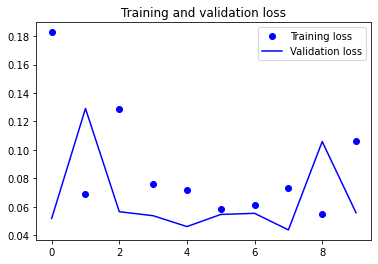

In [10]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Test Images


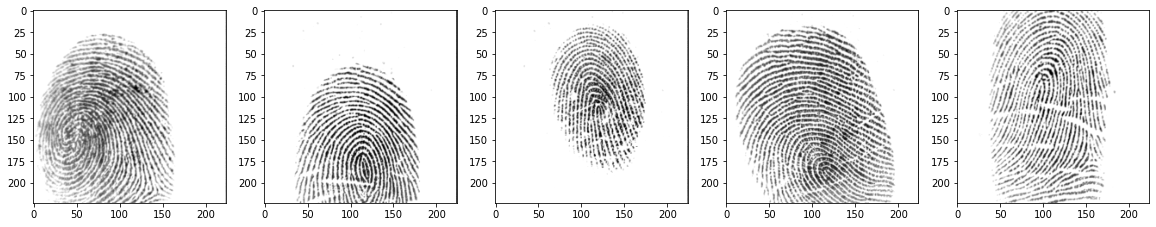

Reconstruction of Test Images


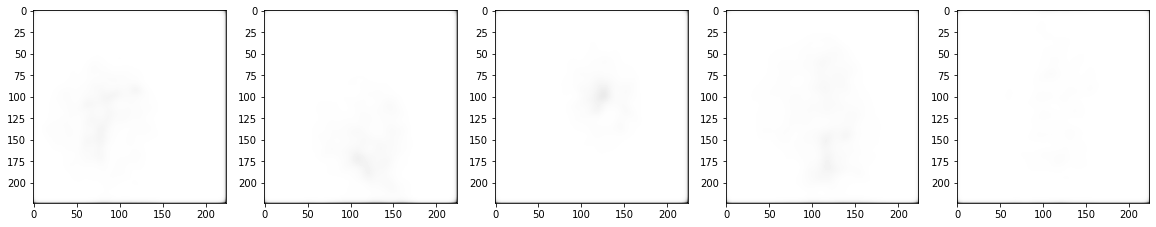

In [11]:
pred = autoencoder.predict(valid_X)
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(valid_ground[i, ..., 0], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

In [40]:
data = glob('DB1_B/*')
#data= glob('/SOCOFing/Real/*')
images = []
def read_images(data):
    for i in range(len(data)):
        img = cv2.imread(data[i],0)
        img = cv2.resize(img,(224,224))
        images.append(img)
    return images
images = read_images(data)
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr = images_arr.reshape(-1,224,224, 1)
images_arr.shape


(80, 224, 224, 1)

In [51]:
#data = glob('DB1_B/*')
data= glob('C:/Users/vinayaka s sajjan/Desktop/file_manager/python/IFSCR/SOCOFing/Real/*')
images = []
def read_images(data):
    for i in range(len(data)):
        img = cv2.imread(data[i],0)
        img = cv2.resize(img,(100,100))
        images.append(img)
    return images
images = read_images(data)
print(len(images))
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr = images_arr.reshape(-1,100,100, 1)
images_arr.shape


6000


(6000, 100, 100, 1)

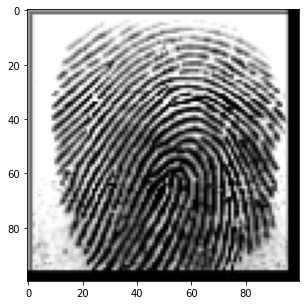

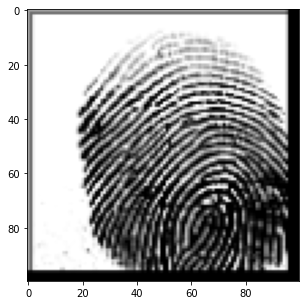

In [52]:
for i in range(2):
    plt.figure(figsize=[5, 5])
    curr_img = np.reshape(images_arr[i], (100,100))
    plt.imshow(curr_img, cmap='gray')
    plt.show()

In [58]:
images_arr = images_arr / np.max(images_arr)
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(images_arr,images_arr,test_size=0.2,random_state=13)
batch_size = 128
epochs = 10
inChannel = 1
x, y = 100,100
input_img = Input(shape = (x, y, inChannel))
def autoencoder(input_img):
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)

    
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) 
    up1 = UpSampling2D((2,2))(conv4) 
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) 
    up2 = UpSampling2D((2,2))(conv5) 
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) 
    return decoded

In [59]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 128)       1475

In [63]:
input_img = Input(shape=(100, 100, 1))

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded =Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Compile model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'mae'])


In [64]:
images_arr = images_arr / np.max(images_arr)
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(images_arr,images_arr,test_size=0.2,random_state=13)
batch_size = 128
epochs = 10
inChannel = 1
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Epoch 1/10
23/38 [=================>............] - ETA: 3:01 - loss: 0.6007 - mse: 0.0999 - mae: 0.2669

KeyboardInterrupt: 